# CMPE 255: Data Mining Project
# Smart Energy Advisor: A Data-Driven Approach to Household Energy Conservation

### - Sai Anuraghav Savadam (016882437)
### - Shireen Faraha Shaik (017402801)
### - Hardi Trivedi(016589768)


### Importing Libraries

In [1]:
import pandas as pd
import zipfile
import os


### Loading Dataset and Data Preprocessing

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/Shareddrives/CMPE_255_Dataset/household_power_consumption.txt", sep=';', parse_dates={'Datetime': ['Date', 'Time']},
                 infer_datetime_format=True, na_values=['?'])

df.dropna(inplace=True)

In [4]:
def add_time_features(df):
    df['year'] = df['Datetime'].dt.year
    df['month'] = df['Datetime'].dt.month
    df['day'] = df['Datetime'].dt.day
    df['hour'] = df['Datetime'].dt.hour
    df['day_of_week'] = df['Datetime'].dt.dayofweek
    df['weekend'] = (df['day_of_week'] >= 5).astype(int)
    return df

# Apply feature engineering to the dataset
df = add_time_features(df)

### Exploratory Data Analysis

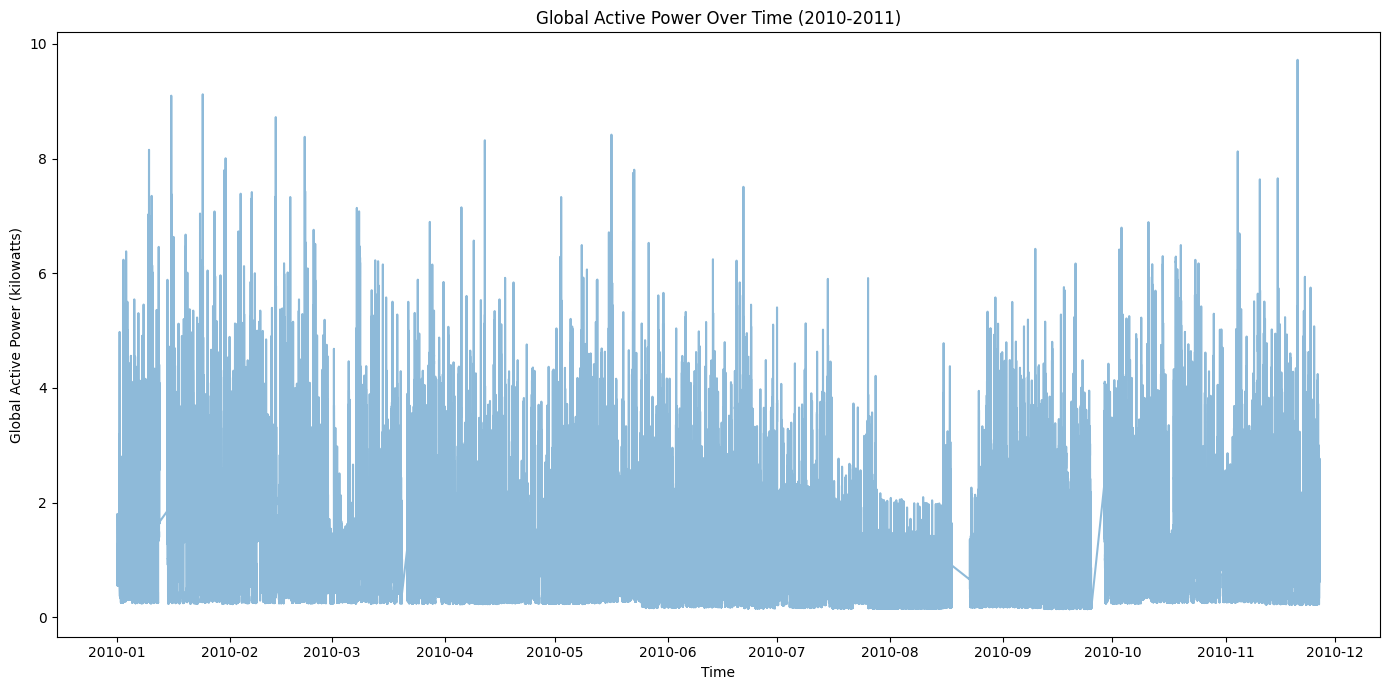

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for the timeframe of 2010 to 2011
df_2010_2011 = df[(df['Datetime'] >= '2010-01-01') & (df['Datetime'] <= '2011-12-31')]

# Now plot the filtered data
plt.figure(figsize=(14, 7))
plt.plot(df_2010_2011['Datetime'], df_2010_2011['Global_active_power'], alpha=0.5)
plt.title('Global Active Power Over Time (2010-2011)')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kilowatts)')
plt.tight_layout()
#plt.savefig('global_active_power_2010_2011.png')
plt.show()
plt.close()


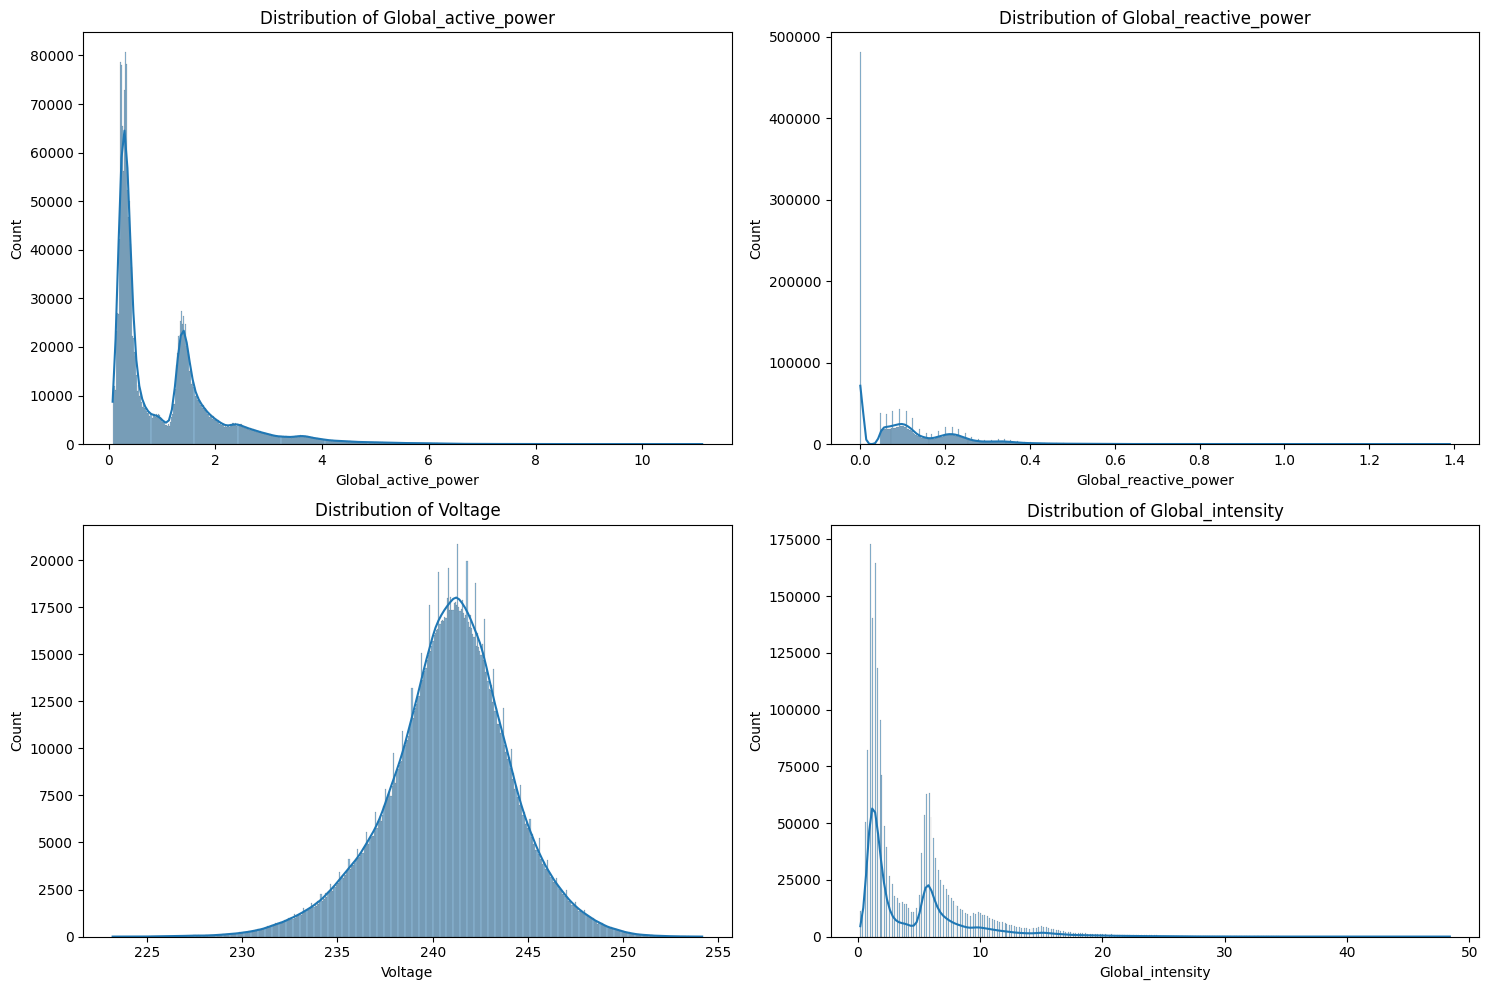

In [6]:
# EDA: Distribution of variables
numerical_features = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
#plt.savefig('distribution_of_variables.png')
plt.show()
plt.close()



### Clustering



In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

features = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
# Assuming df is your DataFrame and 'features' is a list of feature column names
X = df[features].values

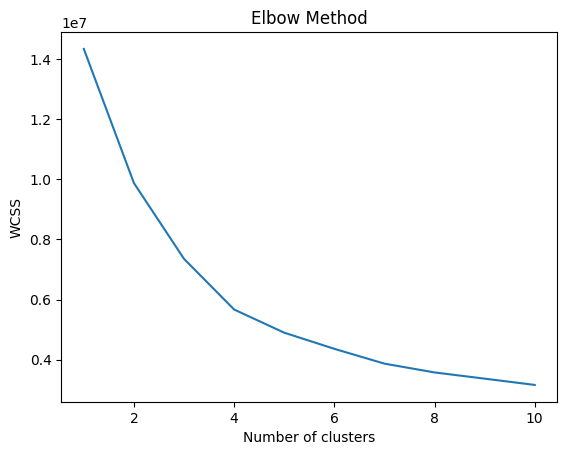

In [8]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Using the Elbow method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.show()

In [9]:
# Choose the number of clusters based on the plot
num_clusters = 4 #(number you decide based on the elbow plot)

# Apply K-means with the optimal number of clusters
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)

In [10]:
from sklearn.metrics import silhouette_score
import numpy as np
# Assume X_scaled is your normalized data and y_kmeans are your cluster labels
# Take a sample of, say, 10,000 points
sample_size = min(10000, len(X_scaled))
indices = np.random.choice(range(len(X_scaled)), size=sample_size, replace=False)

sample_data = X_scaled[indices]
sample_labels = y_kmeans[indices]

# Calculate the silhouette score on the sample
silhouette_avg = silhouette_score(sample_data, sample_labels)
print('The average silhouette_score is:', silhouette_avg)

The average silhouette_score is: 0.4369726884652229


In [11]:
silhouette_avg = silhouette_score(X_scaled, y_kmeans, sample_size=min(10000, len(X_scaled)), n_jobs=-1)

In [12]:
silhouette_avg

0.4359345402138473

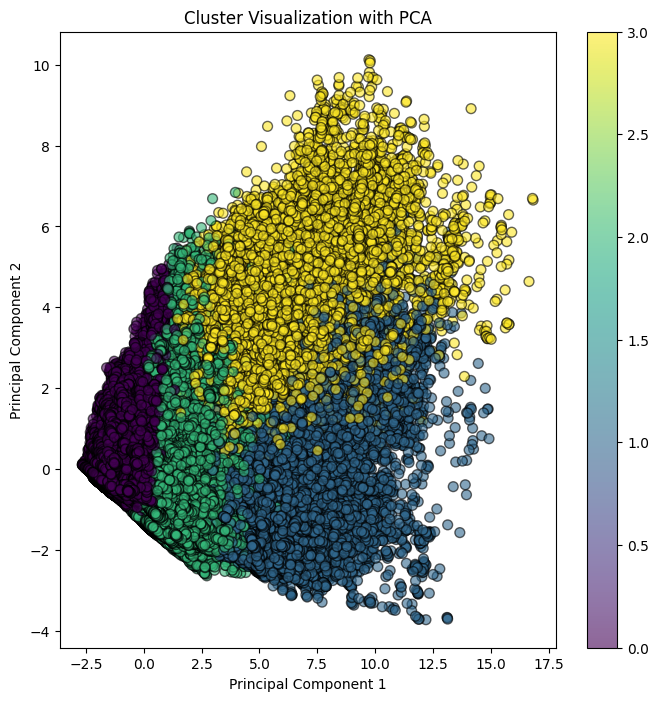

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assume X_scaled is your feature matrix after scaling
# and y_kmeans are the cluster labels from the K-means algorithm

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.6)
plt.title('Cluster Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

In [14]:
# Add the cluster labels to your original DataFrame
df['Cluster'] = y_kmeans

# Save the DataFrame with the cluster labels
df.to_csv('clustered_data.csv', index=False)

### Time - series Forecasting  

-Anuraghav

### Classification

-Shireen
